In [1]:
import pickle

import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('../data/datasets/contents.csv')
df

label                                               text  \
0           1  y-zoom piano roll a y-zoom on the piano roll w...   
1           0  buggy behavior in selection ! screenshot from ...   
2           1  auto update feature hi,\r \r great job so far,...   
3           1  filter out noisy endpoints in logs i think we ...   
4           0  enable pid on / pid off alarm actions for ardu...   
...       ...                                                ...   
449995      0  shield against invalid dates makes'em crash th...   
449996      0  fix the knight seriously, if you do just one t...   
449997      0  portaudio playback binding crashes often, ubun...   
449998      1  add --db-path option for allowing user to spec...   
449999      0  staff users cannot log in to admin i added adm...   

                                           Content_Parsed  
0          -zoom piano roll -zoom piano roll would useful  
1       buggy behavior selection screenshot 2016-02-23...  
2       auto update feature hi\r \r great job far @sae...  
3       filter noisy endpoints log think stop log requ...  
4       enable pid / pid alarm action arduino/tc4 expe...  
...                                                   ...  
449995  shield invalid date makes'em crash renderer |\...  
449996                fix knight seriously one thing week  
449997  portaudio playback bind crash often ubuntu 14 ...  
449998  add --db-path option allow user specify custom...  
449999  staff users cannot log admin add admire staff ...  

[450000 rows x 3 columns]

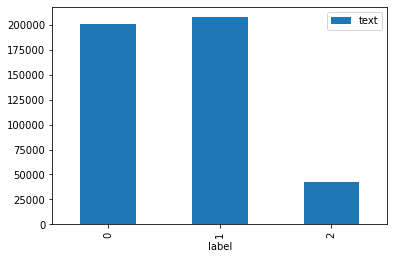

In [3]:
df.groupby('label').count()[['text']].plot.bar()
df['News length'] = df['text'].str.len()

In [4]:
df.groupby('label').count()/len(df)
# Prédire la classe majoritaire → accuracy:46%
# /!\ imbalanced dataset → misleading

text  Content_Parsed  News length
label                                       
0      0.445513        0.445513     0.445513
1      0.460707        0.460707     0.460707
2      0.093780        0.093780     0.093780

<AxesSubplot:title={'center':'News length'}, xlabel='label'>

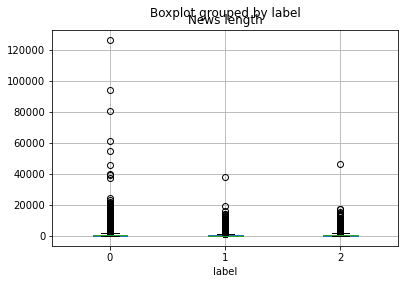

In [4]:
df['News length'] = df['text'].str.len()
df.boxplot(column='News length', by='label')

<AxesSubplot:title={'center':'News length'}, xlabel='label'>

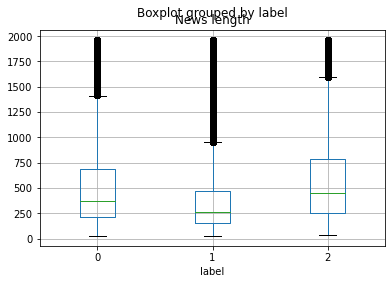

In [5]:
df[df['News length'] < df['News length'].quantile(0.95)].boxplot(column='News length', by='label')